# BOOK DATA SET

In [3]:
!pip install mlxtend

In [2]:
import pandas as pd
from mlxtend.frequent_patterns import apriori,association_rules
from mlxtend.preprocessing import TransactionEncoder
import seaborn as sns
#conda install -c conda-forge mlxtend

In [3]:
book = pd.read_csv("C:\\Users\\Admin\\Downloads\\book.csv")
book.head()

,ChildBks,YouthBks,CookBks,DoItYBks,RefBks,ArtBks,GeogBks,ItalCook,ItalAtlas,ItalArt,Florence
0,0,1,0,1,0,0,1,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,1,0,1,0,0,0,0
4,0,0,1,0,0,0,1,0,0,0,0


In [4]:
df=pd.get_dummies(book)
df.head()

,ChildBks,YouthBks,CookBks,DoItYBks,RefBks,ArtBks,GeogBks,ItalCook,ItalAtlas,ItalArt,Florence
0,0,1,0,1,0,0,1,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,1,0,1,0,0,0,0
4,0,0,1,0,0,0,1,0,0,0,0


In [5]:
frequent_itemsets = apriori(df, min_support=0.1, use_colnames=True)
frequent_itemsets

,support,itemsets
0,0.4230,(ChildBks)
1,0.2475,(YouthBks)
2,0.4310,(CookBks)
3,0.2820,(DoItYBks)
4,0.2145,(RefBks)
5,0.2410,(ArtBks)
6,0.2760,(GeogBks)
7,0.1135,(ItalCook)
8,0.1085,(Florence)
9,0.1650,"(YouthBks, ChildBks)"


In [6]:
frequent_itemsets = apriori(df, min_support=0.2, use_colnames=True)
frequent_itemsets

,support,itemsets
0,0.4230,(ChildBks)
1,0.2475,(YouthBks)
2,0.4310,(CookBks)
3,0.2820,(DoItYBks)
4,0.2145,(RefBks)
5,0.2410,(ArtBks)
6,0.2760,(GeogBks)
7,0.2560,"(CookBks, ChildBks)"


In [8]:
frequent_items=apriori(df, min_support=0.005, max_len=3,use_colnames = True)
frequent_items


,support,itemsets
0,0.4230,(ChildBks)
1,0.2475,(YouthBks)
2,0.4310,(CookBks)
3,0.2820,(DoItYBks)
4,0.2145,(RefBks)
...,...,...
219,0.0130,"(Florence, GeogBks, ItalCook)"
220,0.0115,"(GeogBks, ItalAtlas, ItalArt)"
221,0.0090,"(Florence, GeogBks, ItalArt)"
222,0.0125,"(ItalCook, ItalAtlas, ItalArt)"


In [29]:
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=0.7)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(ChildBks),(YouthBks),0.4230,0.2475,0.1650,0.390071,1.576044,0.060308,1.233750
1,(YouthBks),(ChildBks),0.2475,0.4230,0.1650,0.666667,1.576044,0.060308,1.731000
2,(ChildBks),(CookBks),0.4230,0.4310,0.2560,0.605201,1.404179,0.073687,1.441240
3,(CookBks),(ChildBks),0.4310,0.4230,0.2560,0.593968,1.404179,0.073687,1.421069
4,(ChildBks),(DoItYBks),0.4230,0.2820,0.1840,0.434988,1.542511,0.064714,1.270770
...,...,...,...,...,...,...,...,...,...
95,"(CookBks, GeogBks)",(ArtBks),0.1925,0.2410,0.1035,0.537662,2.230964,0.057107,1.641657
96,"(ArtBks, GeogBks)",(CookBks),0.1275,0.4310,0.1035,0.811765,1.883445,0.048547,3.022812
97,(CookBks),"(ArtBks, GeogBks)",0.4310,0.1275,0.1035,0.240139,1.883445,0.048547,1.148237
98,(ArtBks),"(CookBks, GeogBks)",0.2410,0.1925,0.1035,0.429461,2.230964,0.057107,1.415327


In [9]:
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(CookBks),(ChildBks),0.431,0.423,0.256,0.593968,1.404179,0.073687,1.421069
1,(ChildBks),(CookBks),0.423,0.431,0.256,0.605201,1.404179,0.073687,1.441240


In [30]:
rules.sort_values('lift',ascending = False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
28,(CookBks),(ItalCook),0.4310,0.1135,0.1135,0.263341,2.320186,0.064582,1.203406
29,(ItalCook),(CookBks),0.1135,0.4310,0.1135,1.000000,2.320186,0.064582,inf
76,"(ChildBks, ArtBks)",(GeogBks),0.1625,0.2760,0.1020,0.627692,2.274247,0.057150,1.944628
81,(GeogBks),"(ChildBks, ArtBks)",0.2760,0.1625,0.1020,0.369565,2.274247,0.057150,1.328448
87,(ArtBks),"(CookBks, DoItYBks)",0.2410,0.1875,0.1015,0.421162,2.246196,0.056313,1.403674
...,...,...,...,...,...,...,...,...,...
5,(DoItYBks),(ChildBks),0.2820,0.4230,0.1840,0.652482,1.542511,0.064714,1.660347
12,(CookBks),(YouthBks),0.4310,0.2475,0.1620,0.375870,1.518667,0.055328,1.205678
13,(YouthBks),(CookBks),0.2475,0.4310,0.1620,0.654545,1.518667,0.055328,1.647105
3,(CookBks),(ChildBks),0.4310,0.4230,0.2560,0.593968,1.404179,0.073687,1.421069


In [31]:
rules[rules.lift>1]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(ChildBks),(YouthBks),0.4230,0.2475,0.1650,0.390071,1.576044,0.060308,1.233750
1,(YouthBks),(ChildBks),0.2475,0.4230,0.1650,0.666667,1.576044,0.060308,1.731000
2,(ChildBks),(CookBks),0.4230,0.4310,0.2560,0.605201,1.404179,0.073687,1.441240
3,(CookBks),(ChildBks),0.4310,0.4230,0.2560,0.593968,1.404179,0.073687,1.421069
4,(ChildBks),(DoItYBks),0.4230,0.2820,0.1840,0.434988,1.542511,0.064714,1.270770
...,...,...,...,...,...,...,...,...,...
95,"(CookBks, GeogBks)",(ArtBks),0.1925,0.2410,0.1035,0.537662,2.230964,0.057107,1.641657
96,"(ArtBks, GeogBks)",(CookBks),0.1275,0.4310,0.1035,0.811765,1.883445,0.048547,3.022812
97,(CookBks),"(ArtBks, GeogBks)",0.4310,0.1275,0.1035,0.240139,1.883445,0.048547,1.148237
98,(ArtBks),"(CookBks, GeogBks)",0.2410,0.1925,0.1035,0.429461,2.230964,0.057107,1.415327


<ipython-input-22-32a4734f4beb>:1: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
  plt.bar(x = list(range(1,11)),height = frequent_items.support[1:11],color='rgmyk');


Text(0, 0.5, 'support')

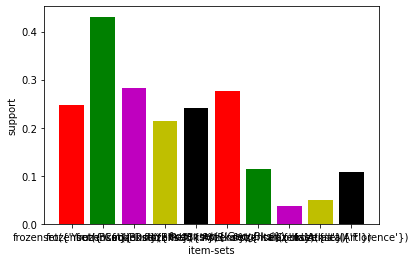

In [22]:
plt.bar(x = list(range(1,11)),height = frequent_items.support[1:11],color='rgmyk');
plt.xticks(list(range(1,11)),frequent_items.itemsets[1:11])
plt.xlabel('item-sets');plt.ylabel('support')

# MOVIES DATASET

In [14]:
movies = pd.read_csv("C:\\Users\\Admin\\Downloads\\my_movies.csv")
movies.head()

,V1,V2,V3,V4,V5,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
0,Sixth Sense,LOTR1,Harry Potter1,Green Mile,LOTR2,1,0,1,1,0,1,0,0,0,1
1,Gladiator,Patriot,Braveheart,NaN,NaN,0,1,0,0,1,0,0,0,1,0
2,LOTR1,LOTR2,NaN,NaN,NaN,0,0,1,0,0,1,0,0,0,0
3,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
4,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0


In [15]:
df=pd.get_dummies(movies)
df.head()

,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile,...,V2_LOTR,V2_LOTR1,V2_LOTR2,V2_Patriot,V3_Braveheart,V3_Gladiator,V3_Harry Potter1,V3_Sixth Sense,V4_Green Mile,V5_LOTR2
0,1,0,1,1,0,1,0,0,0,1,...,0,1,0,0,0,0,1,0,1,1
1,0,1,0,0,1,0,0,0,1,0,...,0,0,0,1,1,0,0,0,0,0
2,0,0,1,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,1,1,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
4,1,1,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0


In [16]:
frequent_itemsets = apriori(df, min_support=0.1, use_colnames=True)
frequent_itemsets

,support,itemsets
0,0.6,(Sixth Sense)
1,0.7,(Gladiator)
2,0.2,(LOTR1)
3,0.2,(Harry Potter1)
4,0.6,(Patriot)
...,...,...
1392,0.1,"(V1_Sixth Sense, Harry Potter1, V2_LOTR1, Sixt..."
1393,0.1,"(V1_Sixth Sense, LOTR2, V2_LOTR1, Sixth Sense,..."
1394,0.1,"(V1_Sixth Sense, Harry Potter1, LOTR2, V2_LOTR..."
1395,0.1,"(V1_Sixth Sense, Harry Potter1, LOTR2, V2_LOTR..."


In [18]:
frequent_items1=apriori(df, min_support=0.005, max_len=3,use_colnames = True)
frequent_items1


,support,itemsets
0,0.6,(Sixth Sense)
1,0.7,(Gladiator)
2,0.2,(LOTR1)
3,0.2,(Harry Potter1)
4,0.6,(Patriot)
...,...,...
337,0.1,"(V4_Green Mile, V2_LOTR, V3_Gladiator)"
338,0.1,"(V4_Green Mile, V3_Harry Potter1, V2_LOTR1)"
339,0.1,"(V3_Harry Potter1, V5_LOTR2, V2_LOTR1)"
340,0.1,"(V4_Green Mile, V5_LOTR2, V2_LOTR1)"


In [20]:
rules1=association_rules(frequent_items,metric='lift', min_threshold=1)
rules1


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(YouthBks),(ChildBks),0.2475,0.4230,0.1650,0.666667,1.576044,0.060308,1.731000
1,(ChildBks),(YouthBks),0.4230,0.2475,0.1650,0.390071,1.576044,0.060308,1.233750
2,(CookBks),(ChildBks),0.4310,0.4230,0.2560,0.593968,1.404179,0.073687,1.421069
3,(ChildBks),(CookBks),0.4230,0.4310,0.2560,0.605201,1.404179,0.073687,1.441240
4,(DoItYBks),(ChildBks),0.2820,0.4230,0.1840,0.652482,1.542511,0.064714,1.660347
...,...,...,...,...,...,...,...,...,...
1049,"(Florence, ItalArt)",(ItalCook),0.0125,0.1135,0.0095,0.760000,6.696035,0.008081,3.693750
1050,"(ItalCook, ItalArt)",(Florence),0.0375,0.1085,0.0095,0.253333,2.334869,0.005431,1.193973
1051,(Florence),"(ItalCook, ItalArt)",0.1085,0.0375,0.0095,0.087558,2.334869,0.005431,1.054861
1052,(ItalCook),"(Florence, ItalArt)",0.1135,0.0125,0.0095,0.083700,6.696035,0.008081,1.077704


In [37]:
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=0.7)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.80
1,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.40
2,(LOTR1),(Sixth Sense),0.2,0.6,0.1,0.500000,0.833333,-0.02,0.80
3,(Sixth Sense),(LOTR1),0.6,0.2,0.1,0.166667,0.833333,-0.02,0.96
4,(Sixth Sense),(Harry Potter1),0.6,0.2,0.1,0.166667,0.833333,-0.02,0.96
...,...,...,...,...,...,...,...,...,...
64247,(LOTR2),"(LOTR1, V4_Green Mile, V5_LOTR2, V1_Sixth Sens...",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80
64248,(Sixth Sense),"(LOTR1, V4_Green Mile, V5_LOTR2, V1_Sixth Sens...",0.6,0.1,0.1,0.166667,1.666667,0.04,1.08
64249,(Harry Potter1),"(LOTR1, V4_Green Mile, V5_LOTR2, V1_Sixth Sens...",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80
64250,(V3_Harry Potter1),"(LOTR1, V4_Green Mile, V5_LOTR2, V1_Sixth Sens...",0.1,0.1,0.1,1.000000,10.000000,0.09,inf


In [38]:
rules.sort_values('lift',ascending = False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
32126,"(LOTR1, Sixth Sense, Harry Potter1, V3_Harry P...","(V5_LOTR2, LOTR2, Green Mile)",0.1,0.1,0.1,1.000000,10.000000,0.09,inf
33437,"(V2_LOTR1, LOTR2, Harry Potter1)","(LOTR1, V4_Green Mile, V5_LOTR2, Sixth Sense)",0.1,0.1,0.1,1.000000,10.000000,0.09,inf
33415,"(LOTR1, V2_LOTR1, Sixth Sense)","(V4_Green Mile, V5_LOTR2, LOTR2, Harry Potter1)",0.1,0.1,0.1,1.000000,10.000000,0.09,inf
33416,"(LOTR1, V2_LOTR1, Harry Potter1)","(V4_Green Mile, V5_LOTR2, LOTR2, Sixth Sense)",0.1,0.1,0.1,1.000000,10.000000,0.09,inf
33417,"(LOTR1, Sixth Sense, LOTR2)","(V4_Green Mile, V5_LOTR2, Harry Potter1, V2_LO...",0.1,0.1,0.1,1.000000,10.000000,0.09,inf
...,...,...,...,...,...,...,...,...,...
1664,(Gladiator),"(V4_Green Mile, Sixth Sense, Green Mile)",0.7,0.2,0.1,0.142857,0.714286,-0.04,0.933333
665,"(V1_Sixth Sense, Green Mile)",(Gladiator),0.2,0.7,0.1,0.500000,0.714286,-0.04,0.600000
1735,(Gladiator),"(V4_Green Mile, Sixth Sense, V1_Sixth Sense)",0.7,0.2,0.1,0.142857,0.714286,-0.04,0.933333
3613,"(V4_Green Mile, V1_Sixth Sense, Green Mile)",(Gladiator),0.2,0.7,0.1,0.500000,0.714286,-0.04,0.600000


In [39]:
rules[rules.lift>1]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.80
1,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.40
6,(Sixth Sense),(Patriot),0.6,0.6,0.4,0.666667,1.111111,0.04,1.20
7,(Patriot),(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.20
10,(LOTR),(Sixth Sense),0.1,0.6,0.1,1.000000,1.666667,0.04,inf
...,...,...,...,...,...,...,...,...,...
64247,(LOTR2),"(LOTR1, V4_Green Mile, V5_LOTR2, V1_Sixth Sens...",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80
64248,(Sixth Sense),"(LOTR1, V4_Green Mile, V5_LOTR2, V1_Sixth Sens...",0.6,0.1,0.1,0.166667,1.666667,0.04,1.08
64249,(Harry Potter1),"(LOTR1, V4_Green Mile, V5_LOTR2, V1_Sixth Sens...",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80
64250,(V3_Harry Potter1),"(LOTR1, V4_Green Mile, V5_LOTR2, V1_Sixth Sens...",0.1,0.1,0.1,1.000000,10.000000,0.09,inf


In [21]:
rules[rules1.lift>1]

<ipython-input-21-93c8e64d32c8>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  rules[rules1.lift>1]


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(CookBks),(ChildBks),0.431,0.423,0.256,0.593968,1.404179,0.073687,1.421069
1,(ChildBks),(CookBks),0.423,0.431,0.256,0.605201,1.404179,0.073687,1.441240


<ipython-input-23-86c16488a2f3>:1: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
  plt.bar(x = list(range(1,11)),height = frequent_items1.support[1:11],color='rgmyk');


Text(0, 0.5, 'support')

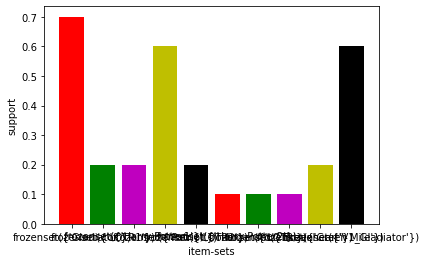

In [23]:
plt.bar(x = list(range(1,11)),height = frequent_items1.support[1:11],color='rgmyk');
plt.xticks(list(range(1,11)),frequent_items1.itemsets[1:11])
plt.xlabel('item-sets');plt.ylabel('support')